## Using the Computer Vision API


### Create a Computer Vision API Service
To provision a Computer Vision API service in your Azure subscription, Follow these steps:

1. Open another browser tab and navigate to https://portal.azure.com.
2. Sign in using your Microsoft account.
3. Click **+ New**, and in the **AI + Cognitive Services** category, click **See all**.
<br>
<img src="./images/Azure01.png" width="480">
<br>
4. In the list of cognitive services, click **Computer Vision API**.
<br>
<img src="./images/Azure02.png" width="480">
<br>

5. In the **Computer Vision API** blade, click **Create**.
<br>
<img src="./images/Azure03.png" width="480">
<br>

6. In the **Create** blade, enter the following details, and then click **Create**
<br>
<img src="./images/Azure04.png" width="480">
<br>

  * **Name**: A unique name for your service.
  * **Subscription**: Your Azure subscription.
  * **Location**: Choose the Azure datacenter location where you want to host your service.
  * **Pricing tier**: Choose the F0 pricing tier.
  * **Resource Group**: Choose the existing resource group you created in the previous lab (or create a new one if you didn't complete the previous lab)
  * Read the notice about the use of your data, and select the checkbox.
7. Wait for the service to be created.
8. When deployment is complete, click **All Resources** and then click your Computer Vision service to open its blade.
9. In the blade for your Computer Vision service, note the **Endpoint** URL. Then assign the base URI (*location*.api.cognitive.microsoft.com) for your service to the **visionURI** variable in the cell below.
10. In the blade for your Computer Vision service, click **Keys** and then copy **Key 1** to the clipboard and paste it into the **visionKey** variable assignment value in the cell below. 
11. Run the cell below to assign the variables.


In [1]:
visionURI = 'westcentralus.api.cognitive.microsoft.com'
visionKey = '11d7b1a32b624b8b9b60f87b2c0cbca8'

### Get An Image from a URL
Let's start with the same image we analyzed previously.

Run the code in the cell below to retrieve the original color image from its URL:

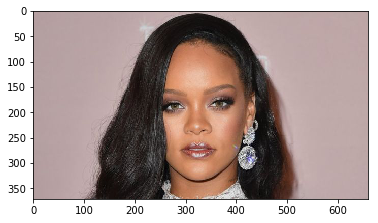

In [2]:
%matplotlib inline
from matplotlib.pyplot import imshow
from PIL import Image
import requests
from io import BytesIO


img_url = 'https://ichef.bbci.co.uk/news/660/cpsprodpb/184D2/production/_103683599_gettyimages-1032947568.jpg'
  
#img_url = 'https://static01.nyt.com/images/2017/09/12/us/12xp-monkey1/12xp-monkey1-facebookJumbo.jpg'

# Get the image and show it
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
imshow(img)

### Use the Computer Vision API to Get Image Features
The Computer Vision API uses a machine learning model that has been trtained with millions of images. It can extract features from images and return a suggested description, as well as details about the image file and a suggested list of "tags" that apply to it.

Run the cell below to see what caption the Computer Vision API suggests for the image above.

In [3]:
def get_image_features(img_url):
    import http.client, urllib.request, urllib.parse, urllib.error, base64, json

    headers = {
        # Request headers.
        'Content-Type': 'application/json',
        'Ocp-Apim-Subscription-Key': visionKey,
    }

    params = urllib.parse.urlencode({
        # Request parameters. All of them are optional.
        'visualFeatures': 'Categories,Description,Color',
        'language': 'en',
    })

    body = "{'url':'" + img_url + "'}"
    print(body)
    print('\nURL ------:' + visionURI)

    try:
        # Execute the REST API call and get the response.
        conn = http.client.HTTPSConnection(visionURI)
        conn.request("POST", "/vision/v1.0/analyze?%s" % params, body, headers)
        response = conn.getresponse()
        data = response.read()

        # 'data' contains the JSON response.
        parsed = json.loads(data.decode("UTF-8"))
        if response is not None:
            return parsed
        conn.close()


    except Exception as e:
        print('Error:')
        print(e)
        
jsonData = get_image_features(img_url)
desc = jsonData['description']['captions'][0]['text']
print(desc)

{'url':'https://ichef.bbci.co.uk/news/660/cpsprodpb/184D2/production/_103683599_gettyimages-1032947568.jpg'}

URL ------:westcentralus.api.cognitive.microsoft.com
a close up of Rihanna


The description is reasonably, if not exactly, appropriate.

Run the cell below to see the full JSON response, including image properties and suggested tags.

In [4]:
import json

# View the full details returned
print (json.dumps(jsonData, sort_keys=True, indent=2))

{
  "categories": [
    {
      "detail": {
        "celebrities": [
          {
            "confidence": 0.9825034737586975,
            "faceRectangle": {
              "height": 189,
              "left": 229,
              "top": 133,
              "width": 189
            },
            "name": "Rihanna"
          }
        ]
      },
      "name": "people_portrait",
      "score": 0.8984375
    }
  ],
  "color": {
    "accentColor": "504F7C",
    "dominantColorBackground": "Black",
    "dominantColorForeground": "Black",
    "dominantColors": [
      "Black"
    ],
    "isBWImg": false,
    "isBwImg": false
  },
  "description": {
    "captions": [
      {
        "confidence": 0.9580460495581885,
        "text": "a close up of Rihanna"
      }
    ],
    "tags": [
      "person",
      "clothing",
      "woman",
      "young",
      "looking",
      "smiling",
      "hair",
      "wearing",
      "holding",
      "standing",
      "front",
      "girl",
      "white",
      "us

Let's try with a different image:

In [ ]:
img_url = 'https://static01.nyt.com/images/2017/09/12/us/12xp-monkey1/12xp-monkey1-facebookJumbo.jpg'

# Get the image and show it
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
imshow(img)
jsonData = get_image_features(img_url)
desc = jsonData['description']['captions'][0]['text']
print(desc)

How about something a little more complex?

{'url':'https://sportshub.cbsistatic.com/i/2019/02/02/c45bd3aa-fb98-4b24-8455-56f88b2eb284/lebron-curry.jpg'}

URL ------:westcentralus.api.cognitive.microsoft.com
Stephen Curry holding a yellow ball


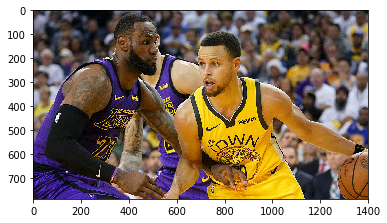

In [19]:
img_url = 'https://sportshub.cbsistatic.com/i/2019/02/02/c45bd3aa-fb98-4b24-8455-56f88b2eb284/lebron-curry.jpg'

# Get the image and show it
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
imshow(img)
jsonData = get_image_features(img_url)
desc = jsonData['description']['captions'][0]['text']
print(desc)

## Using the Face API
While the Computer Vision API is useful for general image analysis, the Face API offers specific functions for analyzing faces in images. This can be useful in a variety of AI scenarios.

### Create a Face API Service
To provision a Computer Vision API service in your Azure subscription, Follow these steps:

1. Open another browser tab and navigate to https://portal.azure.com.
2. Sign in using your Microsoft account.
3. Click **+ New**, and in the **AI + Cognitive Services** category, click **See all**.
4. In the list of cognitive services, click **Face**.
5. In the **Face** blade, click **Create**.
6. In the **Create** blade, enter the following details, and then click **Create**
  * **Name**: A unique name for your service.
  * **Subscription**: Your Azure subscription.
  * **Location**: Choose the Azure datacenter location where you want to host your service.
  * **Pricing tier**: Choose the F0 pricing tier.
  * **Resource Group**: Choose the existing resource group you created in the previous lab (or create a new one if you didn't complete the previous lab)
  * Read the notice about the use of your data, and select the checkbox.
7. Wait for the service to be created.
8. When deployment is complete, click **All Resources** and then click your Face service to open its blade.
9. In the blade for your Face service, copy the *full* **Endpoint** URL (including the *https* prefix and */face/v1.0/* path), and paste it into the **faceURI** variable assignment value in the cell below.
10. In the blade for your Face service, click **Keys** and then copy **Key 1** to the clipboard and paste it into the **faceKey** variable assignment value in the cell below. 
11. Run the cell below to assign the variables.

In [20]:
faceURI = "https://westcentralus.api.cognitive.microsoft.com/face/v1.0"
faceKey = "2b96302c1436409db8f7018ebb7d8d97"

The Face API has a Python SDK, which you can install as a package. This makes it easier to work with.

Run the following cell to install the Face SDK.

In [21]:
!pip install cognitive_face

Now you're ready to use the Face API. First, let's see if we can detect a face in an image:

In [22]:
import cognitive_face as CF

# Set URI and Key
CF.BaseUrl.set(faceURI)
CF.Key.set(faceKey)


# Detect faces in an image
img_url = 'https://sportshub.cbsistatic.com/i/2019/02/02/c45bd3aa-fb98-4b24-8455-56f88b2eb284/lebron-curry.jpg'
result = CF.face.detect(img_url)
print (result)

[{'faceId': '2c06cacb-dba4-4029-b9eb-d40dc4031c18', 'faceRectangle': {'top': 186, 'left': 658, 'width': 150, 'height': 150}}, {'faceId': 'f0311e45-3c55-4b05-95ae-33d58b0bfa4c', 'faceRectangle': {'top': 110, 'left': 451, 'width': 94, 'height': 94}}]


The Face API has detected one face, and assigned it an ID. It also returns the coordinates for the top left corner and the width and height for the rectangle within which the face is detected.

Run the cell below to show the rectange on the image.

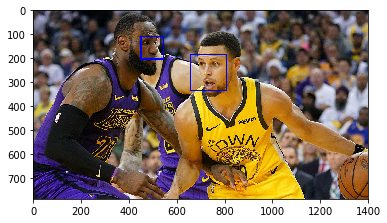

In [23]:
%matplotlib inline
import requests
from io import BytesIO
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw

# Get the image
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))

# Add rectangles for each face found
color="blue"
if result is not None:
    draw = ImageDraw.Draw(img) 
    for currFace in result:
        faceRectangle = currFace['faceRectangle']
        left = faceRectangle['left']
        top = faceRectangle['top']
        width = faceRectangle['width']
        height = faceRectangle['height']
        draw.line([(left,top),(left+width,top)],fill=color, width=5)
        draw.line([(left+width,top),(left+width,top+height)],fill=color , width=5)
        draw.line([(left+width,top+height),(left, top+height)],fill=color , width=5)
        draw.line([(left,top+height),(left, top)],fill=color , width=5)

# show the image
imshow(img)


As well as detecting the face, the Face API assigned an ID to this face. The ID is retained by the service for a while, enabling you to reference it. Run the following cell to see the ID assigned to the face that has been detected:

In [24]:
face1 = result[0]['faceId']
print ("Face 1:" + face1)

Face 1:2c06cacb-dba4-4029-b9eb-d40dc4031c18


One useful thing you can do with the face ID is, is to use it to compare another image and see if a matching face is found. This kind of facial comparison is common in a variety of security / user authentication scenarios.

Let's try it with another image of the same person:

Face 2:4331e36a-99ab-4cdb-86a2-1d7511f2d0f3
Verified
Confidence Level: 0.76171


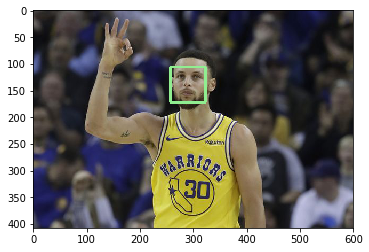

In [25]:
# Get the image to compare
img2_url = 'https://www.nj.com/resizer/R0iU0zb4SRVNucvD4IWufLdc2zw=/600x0/arc-anglerfish-arc2-prod-advancelocal.s3.amazonaws.com/public/VARP7CXXZ5HGJPQG23ZPIC4MMQ.jpg'
response2 = requests.get(img2_url)
img2 = Image.open(BytesIO(response2.content))

# Detect faces in a comparison image
result2 = CF.face.detect(img2_url)

# Assume the first face is the one we want to compare
if result2 is not None:
    face2 = result2[0]['faceId']
    print ("Face 2:" + face2)

def verify_face(face1, face2):
    # By default, assume the match is unverified
    verified = "Not Verified"
    color="red"

    # compare the comparison face to the original one we retrieved previously
    verify = CF.face.verify(face1, face2)

    # if there's a match, set verified and change color to green
    if verify['isIdentical'] == True:
        verified = "Verified"
        color="lightgreen"

    # Display the second face with a red rectange if unverified, or green if verified
    draw = ImageDraw.Draw(img2) 
    for currFace in result2:
        faceRectangle = currFace['faceRectangle']
        left = faceRectangle['left']
        top = faceRectangle['top']
        width = faceRectangle['width']
        height = faceRectangle['height']
        draw.line([(left,top),(left+width,top)] , fill=color, width=5)
        draw.line([(left+width,top),(left+width,top+height)] , fill=color, width=5)
        draw.line([(left+width,top+height),(left, top+height)] , fill=color, width=5)
        draw.line([(left,top+height),(left, top)] , fill=color, width=5)

    # show the image
    imshow(img2)

    # Display verification status and confidence level
    print(verified)
    print ("Confidence Level: " + str(verify['confidence']))

verify_face(face1, face2)

The service has matched the face in a similar photo, with a reasonably high confidence level.

But what about the same face in a different photo - maybe with a stylish goatee beard and sunglasses?:

Face 2:815e2ce9-5450-40a5-8fb9-0c689784f94d
Verified
Confidence Level: 0.60292


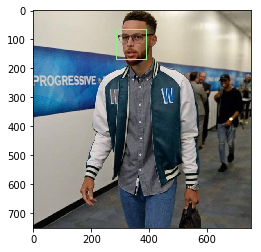

In [26]:
# Get the image to compare
img2_url = 'https://i.pinimg.com/originals/81/f5/b5/81f5b5a6c9e47bfc722b4658385dc5e5.jpg'
response2 = requests.get(img2_url)
img2 = Image.open(BytesIO(response2.content))

# Detect faces in a comparison image
result2 = CF.face.detect(img2_url)

# Assume the first face is the one we want to compare
face2 = result2[0]['faceId']
print ("Face 2:" + face2)

verify_face(face1, face2)


Again, the face is matched - but with lower confidence reflecting the differences in the image.

What if we try to match the original face to a different person?

Face 2:39b88503-0f76-4f04-a7c9-6103d10993e8
Not Verified
Confidence Level: 0.11041


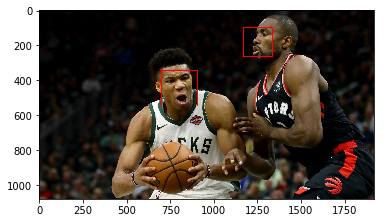

In [28]:
# Get the image to compare
img2_url = 'https://stadiumastro-kentico.s3.amazonaws.com/stadiumastro/media/perform-article/2019/may/18/antetokounmpo-giannis-0517201-getty-ftrjpg_a5c0bqlt0w8o1u6lcu4g4y1hc.jpg'
response2 = requests.get(img2_url)
img2 = Image.open(BytesIO(response2.content))

# Detect faces in a comparison image
result2 = CF.face.detect(img2_url)

# Assume the first face is the one we want to compare
face2 = result2[0]['faceId']
print ("Face 2:" + face2)

verify_face(face1, face2)


No match!

## Using the Custom Vision Cognitive Servive
The *Custom Vision* cognitive service enables you to create custom computer vision solutions.

In this notebook, you will create and train a Custom Vision *image classification* project that can identify pictures of apples and carrots, and use it to classify new images.

> **Note**: *Some of the images used in the lab are sourced from the free image library at <a href='http://www.pachd.com' target='_blank'>www.pachd.com</a>*

### Install the Custom Vision SDK
The first step is to install the Python SDK for the Custom Vision service:

In [15]:
# Install the Custom Vision SDK
! pip install azure-cognitiveservices-vision-customvision

Now lets download and extract the images you will use to train your classifier.

In [16]:
!curl https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/produce.zip -o produce.zip
!unzip produce.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  8 26.3M    8 2255k    0     0  1027k      0  0:00:26  0:00:02  0:00:24 1027k
 27 26.3M   27 7407k    0     0  2319k      0  0:00:11  0:00:03  0:00:08 2319k
 46 26.3M   46 12.2M    0     0  2990k      0  0:00:09  0:00:04  0:00:05 2990k
 65 26.3M   65 17.2M    0     0  3403k      0  0:00:07  0:00:05  0:00:02 3548k
 85 26.3M   85 22.5M    0     0  3731k      0  0:00:07  0:00:06  0:00:01 4707k
100 26.3M  100 26.3M    0     0  3871k      0  0:00:06  0:00:06 --:--:-- 5176k


Archive:  produce.zip
  inflating: apples/Apple1.jpg       
  inflating: apples/Apple10.jpg      
  inflating: apples/Apple2.jpg       
  inflating: apples/Apple3.jpg       
  inflating: apples/Apple4 (2).jpg   
  inflating: apples/Apple4.jpg       
  inflating: apples/Apple5.jpg       
  inflating: apples/Apple6.jpg       
  inflating: apples/Apple7.jpg       
  inflating: apples/Apple8.jpg       
  inflating: apples/Apple9.jpg       
  inflating: carrots/Carrot1.JPG     
  inflating: carrots/Carrot2.JPG     
  inflating: carrots/Carrot3.JPG     
  inflating: carrots/Carrot4.JPG     
  inflating: carrots/Carrot5.JPG     
  inflating: carrots/Carrot6.JPG     
  inflating: carrots/Carrot7.JPG     
  inflating: carrots/Carrot8.JPG     
  inflating: carrots/Carrot9.JPG     


### Create a Custom Vision service instance
Now you're ready to use the Custom Vision service. You'll need to create an instance of the service and get your unique training and prediction keys so you can access it:
1. If you don't already have an Azure subscription, sign up for a free trial at https://azure.microsoft.com/Account/Free.
2. Go to https://customvision.ai/ and sign in using the Microsoft account associated with your Azure subscription.
3. Create a custom vision service in your subscription. Specify any available location, and select the **S0** pricing tier.
4. Click the *Settings* (&#9881;) icon at the top right to view your *training key* and *prediction key*. Then assign these to the variables below, change the location in the *endpoint* as necessary, and run the cell:

In [17]:
TRAINING_KEY = 'YOUR_TRAINING_KEY'
PREDICTION_KEY = 'YOUR_PREDICTION_KEY'
ENDPOINT='https://YOUR_REGION.api.cognitive.microsoft.com' # Use just the base URL - https://<region>.api.cognitive.microsoft.com
PREDICTION_RESOURCE_ID="/subscriptions/YOUR_SUBSCRIPTION_ID/resourceGroups/YOUR_RESOURCE_GROUP/providers/Microsoft.CognitiveServices/accounts/YOUR_ACCOUNT_Prediction"

### Create a Custom Vision project
Now we'll create a project for the apple/carrot classifier:

In [18]:
from azure.cognitiveservices.vision.customvision.training import CustomVisionTrainingClient

trainer = CustomVisionTrainingClient(TRAINING_KEY, endpoint=ENDPOINT)

# Create a new project
print ("Creating project...")
project = trainer.create_project("Produce Classification")
print("Created project!")

Creating project...


ClientRequestError: Error occurred in request., ConnectionError: HTTPSConnectionPool(host='your_region.api.cognitive.microsoft.com', port=443): Max retries exceeded with url: /customvision/v3.0/training/projects?name=Produce%20Classification (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x0000000009A6F128>: Failed to establish a new connection: [Errno 11004] getaddrinfo failed',))

### Add tags
The project will identify images as apples or carrots, so we'll need tags for those classes:

In [ ]:
# Make two tags in the new project
print("Creating tags...")
apple_tag = trainer.create_tag(project.id, "Apple")
carrot_tag = trainer.create_tag(project.id, "Carrot")
print('Created tags!')

### Upload training images
Now that we've got the tags, we need to upload some images of apples and carrots, assign the appropriate tags:

In [ ]:
import os

print("Adding images...")

apples_dir = "apples"
for image in os.listdir(apples_dir):
    with open(os.path.join(apples_dir, image), mode="rb") as img_data: 
        trainer.create_images_from_data(project.id, img_data.read(), [apple_tag.id])

carrots_dir = "carrots"
for image in os.listdir(carrots_dir):
    with open(os.path.join(carrots_dir, image), mode="rb") as img_data: 
        trainer.create_images_from_data(project.id, img_data.read(), [carrot_tag.id])
        
print('Added images!')

Return to your Custom Vision service and click the *Home* (&#8962;) icon to return to the home page, and then open the ***Apple or Carrot*** project to view the images that have been uploaded and tagged.

### Train the project
With the tagged images in place, we're now ready to train a classification model:

In [ ]:
import time

print ("Training...")
# Train the project, checking status every 1 second
iteration = trainer.train_project(project.id)
while (iteration.status == "Training"):
    iteration = trainer.get_iteration(project.id, iteration.id)
    print ("Training status: " + iteration.status)
    time.sleep(1)

# The iteration is now trained. Publish it to the project endpoint
trainer.publish_iteration(project.id, iteration.id, "First Iteration", PREDICTION_RESOURCE_ID)

# Make it the default iteration
iteration = trainer.update_iteration(project_id= project.id, iteration_id=iteration.id, name= "First Iteration", is_default=True)

print ("Trained!")

Return to your Custom Vision service and click the **Performance** tab to view the *Precision* and *Recall* metrics for your trained project. These should be pretty high, even through we only used a few images.

### Use the project to classify images
Now that we have a trained project, we can use it to predict the class of new images that weren't in the training dataset:

In [ ]:
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
%matplotlib inline

# Use two test images
test_img1_url = 'http://www.pachd.com/free-images/food-images/apple-01.jpg'
test_img2_url = 'http://www.pachd.com/free-images/food-images/carrot-02.jpg'

test_image_urls = []
test_image_urls.append(test_img1_url)
test_image_urls.append(test_img2_url)

# Create an instance of the prediction service
predictor = CustomVisionPredictionClient(PREDICTION_KEY, endpoint=ENDPOINT)

# Create a figure
fig = plt.figure(figsize=(16, 8))

# Get the images and show the predicted classes
for url_idx in range(len(test_image_urls)):
    response = requests.get(test_image_urls[url_idx])
    image_contents = Image.open(BytesIO(response.content))
    results = predictor.classify_image_url(project_id=project.id, published_name=iteration.name, url=test_image_urls[url_idx])
    # The results include a prediction for each tag, in descending order of probability - so we'll get the first one
    prediction = results.predictions[0].tag_name + ": {0:.2f}%".format(results.predictions[0].probability * 100)
    # Subplot for image and its predicted class
    a=fig.add_subplot(1,2,url_idx+1)
    imgplot = plt.imshow(image_contents)
    a.set_title(prediction)

plt.show()